## Time series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('infy_stock.csv', parse_dates= ['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
df1= df[['Date','Open','High','Low','Close','Volume']]
df1.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-01,1968.95,1982.00,1956.9,1974.40,500691
1,2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580
2,2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256
3,2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829
4,2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    248 non-null    datetime64[ns]
 1   Open    248 non-null    float64       
 2   High    248 non-null    float64       
 3   Low     248 non-null    float64       
 4   Close   248 non-null    float64       
 5   Volume  248 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


### Datetime Index

In [5]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
df1= df1.set_index("Date")

In [7]:
df1.index  # The index is in form of DatetimeIndex

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

In [8]:
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.40,500691
2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256
2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829
2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479


In [9]:
df1['2015-01-01' : '2015-01-06']

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.4,500691
2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.9,2484256
2015-01-06,1980.00,1985.00,1934.1,1954.2,2416829


In [10]:
df1.Close.mean() # Average of entire col 

1547.9782258064524

In [11]:
df1['2015-12'].Close.mean()

1076.5545454545454

### Resampling

In [12]:
df1.Close.resample('M').mean()

Date
2015-01-31    2091.035714
2015-02-28    2255.180000
2015-03-31    2228.769048
2015-04-30    2124.534211
2015-05-31    1988.190000
2015-06-30    1458.215909
2015-07-31    1018.784783
2015-08-31    1111.854762
2015-09-30    1100.125000
2015-10-31    1135.787500
2015-11-30    1088.681579
2015-12-31    1076.554545
Freq: M, Name: Close, dtype: float64

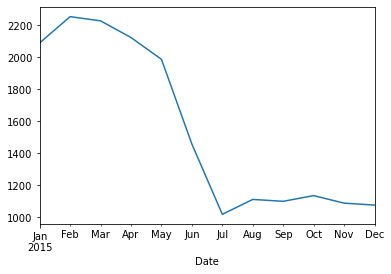

In [13]:
df1.Close.resample('M').mean().plot()

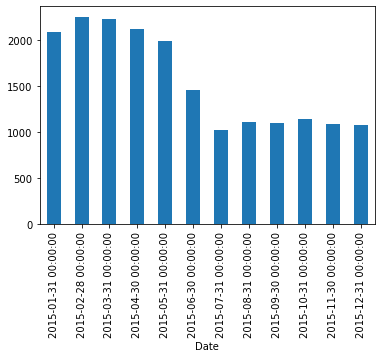

In [14]:
df1.Close.resample('M').mean().plot(kind='bar')

### Date Range
Allows to generate dates.

In [15]:
rng = pd.date_range(start= '06/01/2019', end='06/12/2019', freq= 'B')
rng

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12'],
              dtype='datetime64[ns]', freq='B')

In [16]:
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.40,500691
2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256
2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829
2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479


In [17]:
df2= df1.asfreq('D', method='pad') # carryforwards prices to weekends.
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.4,500691
2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580
2015-01-03,1972.00,2019.05,1972.0,2013.2,1694580
2015-01-04,1972.00,2019.05,1972.0,2013.2,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.9,2484256


In [18]:
# Don't know end date.
rng= pd.date_range(start= '06/01/2019', periods= 12, freq= 'B')
rng

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18'],
              dtype='datetime64[ns]', freq='B')

In [19]:
series= pd.Series(np.random.randint(1,10), index= rng)
series

2019-06-03    3
2019-06-04    3
2019-06-05    3
2019-06-06    3
2019-06-07    3
2019-06-10    3
2019-06-11    3
2019-06-12    3
2019-06-13    3
2019-06-14    3
2019-06-17    3
2019-06-18    3
Freq: B, dtype: int64

### Holidays

In [20]:
rng= pd.date_range(start='7/1/2017', end='7/28/2017', freq= 'B')
rng                                                             # 4th July is holiday

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28'],
              dtype='datetime64[ns]', freq='B')

In [21]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us= CustomBusinessDay(calendar= USFederalHolidayCalendar())
us

<CustomBusinessDay>

In [22]:
rng= pd.date_range(start='7/1/2017', end='7/28/2017', freq= us)
rng      

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28'],
              dtype='datetime64[ns]', freq='C')

### Custom calendar (AbstractHolidayCalendar)

In [23]:
rng= pd.date_range(start='9/1/2020', end='9/27/2020', freq= 'B')
rng

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', freq='B')

In [24]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class IndianHolidayCalendar(AbstractHolidayCalendar):
     rules = [
        Holiday('New year', month=9, day=19, observance=nearest_workday)
     ]
        
ind= CustomBusinessDay(calendar= IndianHolidayCalendar())
ind

<CustomBusinessDay>

In [25]:
rng= pd.date_range(start='9/1/2020', end='9/27/2020', freq= ind)
rng

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', freq='C')

In [26]:
egypt_weekdays = "Sun Mon Tue Wed Thu"

egy = CustomBusinessDay(weekmask= egypt_weekdays)

rng= pd.date_range(start="9/1/2020",periods=22,freq= egy)
rng

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-06',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-20', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', freq='C')

### to_datetime

In [27]:
dates = ['2017-01-05 05:00', 'Jan 5, 2017 13:00', '01/05/2017', '2017.01.05 1:30 pm', '2017/01/05','20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 05:00:00', '2017-01-05 13:00:00',
               '2017-01-05 00:00:00', '2017-01-05 13:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [28]:
pd.to_datetime('5/2/2019', dayfirst= True)

Timestamp('2019-02-05 00:00:00')

#### Custom Date format

In [29]:
pd.to_datetime('5$2$2019', format= '%d$%m$%Y')

Timestamp('2019-02-05 00:00:00')

In [30]:
dates = ['2017-01-05 05:00', 'Jan 5, 2017 13:00', '01/05/2017','dfg','20170105']
pd.to_datetime(dates, errors= 'ignore')  # dfg string got ignored.

Index(['2017-01-05 05:00', 'Jan 5, 2017 13:00', '01/05/2017', 'dfg',
       '20170105'],
      dtype='object')

In [31]:
dates = ['2017-01-05 05:00', 'Jan 5, 2017 13:00', '01/05/2017','dfg','20170105']
pd.to_datetime(dates, errors= 'coerce')

DatetimeIndex(['2017-01-05 05:00:00', '2017-01-05 13:00:00',
               '2017-01-05 00:00:00',                 'NaT',
               '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

### Epoch time

In [32]:
t= 1600497510
dt= pd.to_datetime([t], unit='s')
dt

DatetimeIndex(['2020-09-19 06:38:30'], dtype='datetime64[ns]', freq=None)

In [33]:
1603978025
dt= pd.to_datetime([1603978025], unit='s')
dt

DatetimeIndex(['2020-10-29 13:27:05'], dtype='datetime64[ns]', freq=None)

##### To convert datetime to epoch.

In [34]:
dt.view('int64')

array([1603978025000000000], dtype=int64)

### Period

In [35]:
y= pd.Period('2020')

In [36]:
y.start_time

Timestamp('2020-01-01 00:00:00')

In [37]:
y.end_time

Timestamp('2020-12-31 23:59:59.999999999')

In [38]:
m= pd.Period('2020-01')

In [39]:
m.start_time

Timestamp('2020-01-01 00:00:00')

In [40]:
m.end_time

Timestamp('2020-01-31 23:59:59.999999999')

In [41]:
m+5

Period('2020-06', 'M')

In [42]:
d= pd.Period('2020-01-20')

In [43]:
d.start_time

Timestamp('2020-01-20 00:00:00')

In [44]:
d.end_time

Timestamp('2020-01-20 23:59:59.999999999')

In [45]:
d= pd.Period('2019-02-28')

In [46]:
d+1

Period('2019-03-01', 'D')

In [47]:
d= pd.Period('2020-02-28')

In [48]:
d+1

Period('2020-02-29', 'D')

In [49]:
h= pd.Period('2020-09-02 05:00', freq='H')
h

Period('2020-09-02 05:00', 'H')

In [50]:
h.start_time

Timestamp('2020-09-02 05:00:00')

In [51]:
h.end_time

Timestamp('2020-09-02 05:59:59.999999999')

In [52]:
h+1

Period('2020-09-02 06:00', 'H')

In [53]:
h+ pd.offsets.Hour(2)

Period('2020-09-02 07:00', 'H')

### Quarterly

In [54]:
q1= pd.Period('2020Q1')
q1

Period('2020Q1', 'Q-DEC')

In [55]:
q1.start_time

Timestamp('2020-01-01 00:00:00')

In [56]:
q1.end_time

Timestamp('2020-03-31 23:59:59.999999999')

In [57]:
q1+2

Period('2020Q3', 'Q-DEC')

In [58]:
q= pd.Period('2019Q1', freq='Q-JAN')
q

Period('2019Q1', 'Q-JAN')

In [59]:
q.start_time

Timestamp('2018-02-01 00:00:00')

In [60]:
q.end_time

Timestamp('2018-04-30 23:59:59.999999999')

In [61]:
q+2

Period('2019Q3', 'Q-JAN')

In [62]:
(q+2).start_time

Timestamp('2018-08-01 00:00:00')

In [63]:
(q+2).end_time

Timestamp('2018-10-31 23:59:59.999999999')

### Period Index

In [64]:
i= pd.period_range('2018' ,'2019', freq= 'Q')
i

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [65]:
i= pd.period_range('2018' , periods= 9, freq= 'Q')
i

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4', '2020Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [66]:
i= pd.period_range('2018' ,'2020', freq= 'Q-JAN')
i

PeriodIndex(['2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
             '2020Q2', '2020Q3', '2020Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [67]:
i[0]

Period('2018Q4', 'Q-JAN')

In [68]:
i[0].start_time

Timestamp('2017-11-01 00:00:00')

In [69]:
ps= pd.Series(np.random.randn(len(i)), i)
ps

2018Q4   -0.046472
2019Q1   -0.988965
2019Q2   -2.089917
2019Q3    1.264837
2019Q4    0.882613
2020Q1   -0.354621
2020Q2    0.220393
2020Q3    1.229059
2020Q4   -1.941890
Freq: Q-JAN, dtype: float64

In [70]:
ps.index

PeriodIndex(['2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
             '2020Q2', '2020Q3', '2020Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [71]:
ps['2018':'2019']

2018Q4   -0.046472
2019Q1   -0.988965
2019Q2   -2.089917
2019Q3    1.264837
2019Q4    0.882613
2020Q1   -0.354621
2020Q2    0.220393
2020Q3    1.229059
2020Q4   -1.941890
Freq: Q-JAN, dtype: float64

In [72]:
pst= ps.to_timestamp()
pst

2017-11-01   -0.046472
2018-02-01   -0.988965
2018-05-01   -2.089917
2018-08-01    1.264837
2018-11-01    0.882613
2019-02-01   -0.354621
2019-05-01    0.220393
2019-08-01    1.229059
2019-11-01   -1.941890
Freq: QS-NOV, dtype: float64

In [73]:
pst.index

DatetimeIndex(['2017-11-01', '2018-02-01', '2018-05-01', '2018-08-01',
               '2018-11-01', '2019-02-01', '2019-05-01', '2019-08-01',
               '2019-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [74]:
ps= pst.to_period()
ps

2017Q4   -0.046472
2018Q1   -0.988965
2018Q2   -2.089917
2018Q3    1.264837
2018Q4    0.882613
2019Q1   -0.354621
2019Q2    0.220393
2019Q3    1.229059
2019Q4   -1.941890
Freq: Q-DEC, dtype: float64

In [75]:
ps.index

PeriodIndex(['2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
             '2019Q2', '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

### Timezones
It needs to handle during time series analysis.

In [76]:
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.40,500691
2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580
2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256
2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829
2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479


In [77]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [78]:
df1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

In [80]:
df1= df1.tz_localize(tz= 'Asia/Calcutta')

In [82]:
df1.index

DatetimeIndex(['2015-01-01 00:00:00+05:30', '2015-01-02 00:00:00+05:30',
               '2015-01-05 00:00:00+05:30', '2015-01-06 00:00:00+05:30',
               '2015-01-07 00:00:00+05:30', '2015-01-08 00:00:00+05:30',
               '2015-01-09 00:00:00+05:30', '2015-01-12 00:00:00+05:30',
               '2015-01-13 00:00:00+05:30', '2015-01-14 00:00:00+05:30',
               ...
               '2015-12-17 00:00:00+05:30', '2015-12-18 00:00:00+05:30',
               '2015-12-21 00:00:00+05:30', '2015-12-22 00:00:00+05:30',
               '2015-12-23 00:00:00+05:30', '2015-12-24 00:00:00+05:30',
               '2015-12-28 00:00:00+05:30', '2015-12-29 00:00:00+05:30',
               '2015-12-30 00:00:00+05:30', '2015-12-31 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date', length=248, freq=None)

In [83]:
df1= df1.tz_convert(tz='Europe/London')
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-31 18:30:00+00:00,1968.95,1982.00,1956.9,1974.40,500691
2015-01-01 18:30:00+00:00,1972.00,2019.05,1972.0,2013.20,1694580
2015-01-04 18:30:00+00:00,2009.90,2030.00,1977.5,1995.90,2484256
2015-01-05 18:30:00+00:00,1980.00,1985.00,1934.1,1954.20,2416829
2015-01-06 18:30:00+00:00,1965.00,1974.75,1950.0,1963.55,1812479


In [84]:
df1.index

DatetimeIndex(['2014-12-31 18:30:00+00:00', '2015-01-01 18:30:00+00:00',
               '2015-01-04 18:30:00+00:00', '2015-01-05 18:30:00+00:00',
               '2015-01-06 18:30:00+00:00', '2015-01-07 18:30:00+00:00',
               '2015-01-08 18:30:00+00:00', '2015-01-11 18:30:00+00:00',
               '2015-01-12 18:30:00+00:00', '2015-01-13 18:30:00+00:00',
               ...
               '2015-12-16 18:30:00+00:00', '2015-12-17 18:30:00+00:00',
               '2015-12-20 18:30:00+00:00', '2015-12-21 18:30:00+00:00',
               '2015-12-22 18:30:00+00:00', '2015-12-23 18:30:00+00:00',
               '2015-12-27 18:30:00+00:00', '2015-12-28 18:30:00+00:00',
               '2015-12-29 18:30:00+00:00', '2015-12-30 18:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', name='Date', length=248, freq=None)

In [85]:
df1.index= df1.index.tz_convert(tz='Pacific/Tongatapu')
df1.index

DatetimeIndex(['2015-01-01 07:30:00+13:00', '2015-01-02 07:30:00+13:00',
               '2015-01-05 07:30:00+13:00', '2015-01-06 07:30:00+13:00',
               '2015-01-07 07:30:00+13:00', '2015-01-08 07:30:00+13:00',
               '2015-01-09 07:30:00+13:00', '2015-01-12 07:30:00+13:00',
               '2015-01-13 07:30:00+13:00', '2015-01-14 07:30:00+13:00',
               ...
               '2015-12-17 07:30:00+13:00', '2015-12-18 07:30:00+13:00',
               '2015-12-21 07:30:00+13:00', '2015-12-22 07:30:00+13:00',
               '2015-12-23 07:30:00+13:00', '2015-12-24 07:30:00+13:00',
               '2015-12-28 07:30:00+13:00', '2015-12-29 07:30:00+13:00',
               '2015-12-30 07:30:00+13:00', '2015-12-31 07:30:00+13:00'],
              dtype='datetime64[ns, Pacific/Tongatapu]', name='Date', length=248, freq=None)

In [86]:
rng= pd.date_range(start='1/9/2020', periods=10, freq='H', tz='Europe/London')
rng

DatetimeIndex(['2020-01-09 00:00:00+00:00', '2020-01-09 01:00:00+00:00',
               '2020-01-09 02:00:00+00:00', '2020-01-09 03:00:00+00:00',
               '2020-01-09 04:00:00+00:00', '2020-01-09 05:00:00+00:00',
               '2020-01-09 06:00:00+00:00', '2020-01-09 07:00:00+00:00',
               '2020-01-09 08:00:00+00:00', '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [87]:
s= pd.Series(range(10), index=rng)
s

2020-01-09 00:00:00+00:00    0
2020-01-09 01:00:00+00:00    1
2020-01-09 02:00:00+00:00    2
2020-01-09 03:00:00+00:00    3
2020-01-09 04:00:00+00:00    4
2020-01-09 05:00:00+00:00    5
2020-01-09 06:00:00+00:00    6
2020-01-09 07:00:00+00:00    7
2020-01-09 08:00:00+00:00    8
2020-01-09 09:00:00+00:00    9
Freq: H, dtype: int64

In [88]:
m= s.tz_convert(tz='Asia/Calcutta')
m

2020-01-09 05:30:00+05:30    0
2020-01-09 06:30:00+05:30    1
2020-01-09 07:30:00+05:30    2
2020-01-09 08:30:00+05:30    3
2020-01-09 09:30:00+05:30    4
2020-01-09 10:30:00+05:30    5
2020-01-09 11:30:00+05:30    6
2020-01-09 12:30:00+05:30    7
2020-01-09 13:30:00+05:30    8
2020-01-09 14:30:00+05:30    9
Freq: H, dtype: int64

In [89]:
s - m

2020-01-09 00:00:00+00:00    0
2020-01-09 01:00:00+00:00    0
2020-01-09 02:00:00+00:00    0
2020-01-09 03:00:00+00:00    0
2020-01-09 04:00:00+00:00    0
2020-01-09 05:00:00+00:00    0
2020-01-09 06:00:00+00:00    0
2020-01-09 07:00:00+00:00    0
2020-01-09 08:00:00+00:00    0
2020-01-09 09:00:00+00:00    0
Freq: H, dtype: int64

### Shifting anf Lagging

In [90]:
df3= df1[['Open','Close']]
df3.head()

,Open,Close
Date,,
2015-01-01 07:30:00+13:00,1968.95,1974.40
2015-01-02 07:30:00+13:00,1972.00,2013.20
2015-01-05 07:30:00+13:00,2009.90,1995.90
2015-01-06 07:30:00+13:00,1980.00,1954.20
2015-01-07 07:30:00+13:00,1965.00,1963.55


In [91]:
df3.shift(1).head()

,Open,Close
Date,,
2015-01-01 07:30:00+13:00,NaN,NaN
2015-01-02 07:30:00+13:00,1968.95,1974.4
2015-01-05 07:30:00+13:00,1972.00,2013.2
2015-01-06 07:30:00+13:00,2009.90,1995.9
2015-01-07 07:30:00+13:00,1980.00,1954.2


In [92]:
df3.shift(-2).head()

,Open,Close
Date,,
2015-01-01 07:30:00+13:00,2009.9,1995.90
2015-01-02 07:30:00+13:00,1980.0,1954.20
2015-01-05 07:30:00+13:00,1965.0,1963.55
2015-01-06 07:30:00+13:00,1985.6,1973.45
2015-01-07 07:30:00+13:00,1980.1,2074.45


In [93]:
df3['prev']= df3.Open.shift(1)
df3.head()

,Open,Close,prev
Date,,,
2015-01-01 07:30:00+13:00,1968.95,1974.40,NaN
2015-01-02 07:30:00+13:00,1972.00,2013.20,1968.95
2015-01-05 07:30:00+13:00,2009.90,1995.90,1972.00
2015-01-06 07:30:00+13:00,1980.00,1954.20,2009.90
2015-01-07 07:30:00+13:00,1965.00,1963.55,1980.00


In [94]:
df3['1 day change']= df3.Open-df3.prev
df3.head()

,Open,Close,prev,1 day change
Date,,,,
2015-01-01 07:30:00+13:00,1968.95,1974.40,NaN,NaN
2015-01-02 07:30:00+13:00,1972.00,2013.20,1968.95,3.05
2015-01-05 07:30:00+13:00,2009.90,1995.90,1972.00,37.90
2015-01-06 07:30:00+13:00,1980.00,1954.20,2009.90,-29.90
2015-01-07 07:30:00+13:00,1965.00,1963.55,1980.00,-15.00
